In [66]:
import pandas as pd
import os 
pwd = os.getcwd()
df_1 = pd.read_csv(pwd + "/dim_customers.csv")
df_2 = pd.read_csv(pwd + "/fact_spends.csv")

# left joining it 

In [67]:
dataset_merged = pd.merge(left=df_1 , right= df_2, how="left" , left_on="customer_id" , right_on="customer_id")

In [68]:
df_1.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income'],
      dtype='object')

In [69]:
df_2.columns

Index(['customer_id', 'month', 'category', 'payment_type', 'spend'], dtype='object')

In [70]:
print("hello")

hello


In [71]:
print(4+5)

9


In [72]:
dataset_merged.head(10)

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
5,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,October,Bills,Net Banking,1031
6,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Groceries,Net Banking,1048
7,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Health & Wellness,UPI,922
8,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Apparel,UPI,131
9,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,August,Apparel,UPI,262


In [73]:
dataset_merged.customer_id.nunique()

4000

In [74]:
dataset_merged.dtypes

customer_id       object
age_group         object
city              object
occupation        object
gender            object
marital status    object
avg_income         int64
month             object
category          object
payment_type      object
spend              int64
dtype: object

In [75]:
dataset_merged.describe()

,avg_income,spend
count,864000.000000,864000.000000
mean,51657.032250,614.464994
std,14688.312762,661.571676
min,24816.000000,6.000000
25%,38701.000000,191.000000
50%,50422.000000,395.000000
75%,64773.250000,793.000000
max,86600.000000,10313.000000


## place vs payment type 

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [77]:
print("hel")

hel


In [78]:
dataset_merged.month.head(10)

0          May
1          May
2         June
3    September
4          May
5      October
6         June
7    September
8         June
9       August
Name: month, dtype: object

In [79]:
money_spend = dataset_merged.groupby('month')["spend"].sum().reset_index()

In [80]:
money_spend= money_spend.sort_values(by='spend')

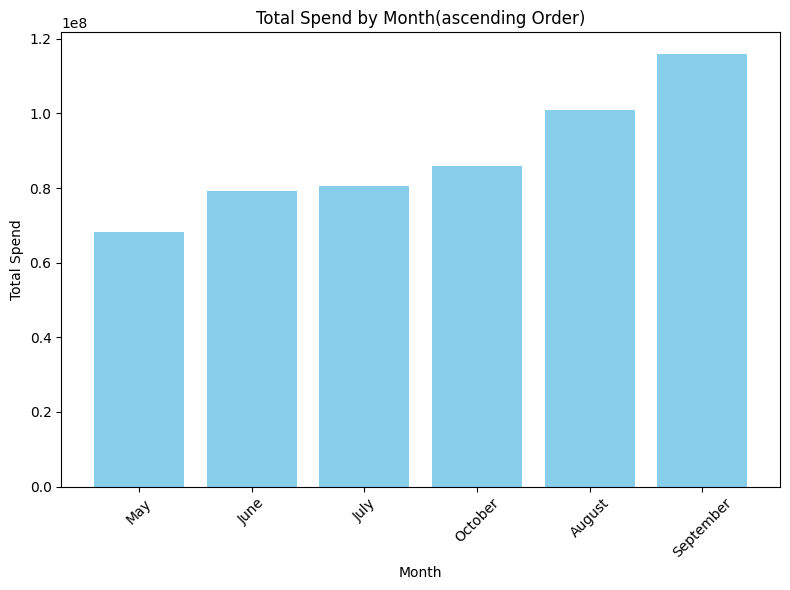

In [81]:
plt.figure(figsize=(8, 6))
plt.bar(money_spend['month'], money_spend['spend'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.title('Total Spend by Month(ascending Order)')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()

plt.show()

In [82]:
dataset_merged.city.nunique()

5

In [83]:
city_payment_type=dataset_merged.groupby('city')["payment_type"].value_counts().reset_index()
city_payment_type

,city,payment_type,count
0,Bengaluru,Debit Card,40554
1,Bengaluru,Credit Card,40554
2,Bengaluru,UPI,40554
3,Bengaluru,Net Banking,40554
4,Chennai,Credit Card,45036
5,Chennai,Debit Card,45036
6,Chennai,Net Banking,45036
7,Chennai,UPI,45036
8,Delhi NCR,Debit Card,40176
9,Delhi NCR,UPI,40176


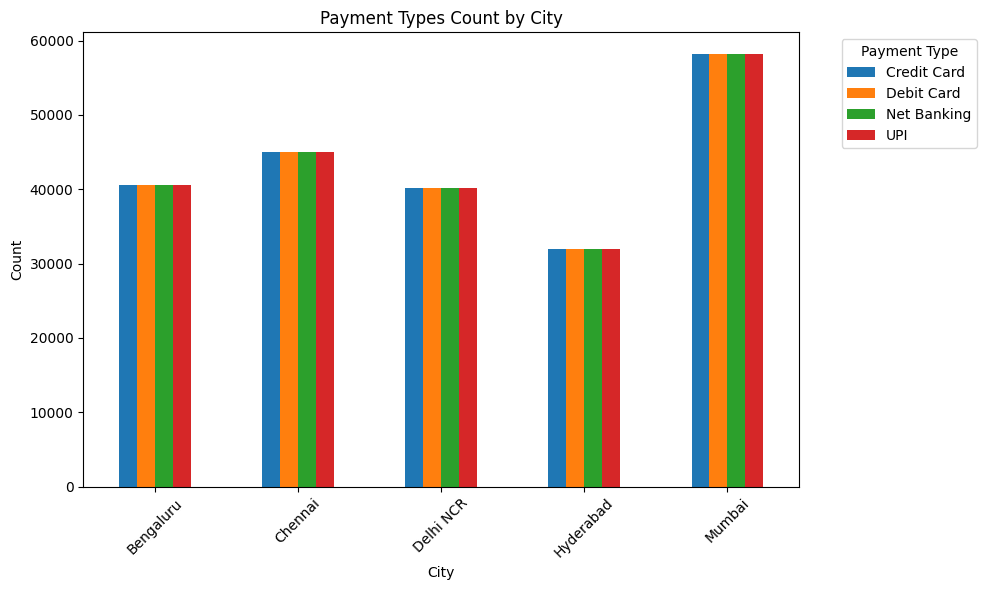

In [84]:
pivot_df = city_payment_type.pivot(index='city', columns='payment_type', values='count')

# Plotting the grouped bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Payment Types Count by City')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [85]:
dataset_merged.city.head(10)

0    Bengaluru
1    Bengaluru
2    Bengaluru
3    Bengaluru
4    Bengaluru
5    Bengaluru
6    Bengaluru
7    Bengaluru
8    Bengaluru
9    Bengaluru
Name: city, dtype: object

In [86]:
dataset_merged.payment_type.head(10)

0    Net Banking
1     Debit Card
2    Credit Card
3     Debit Card
4     Debit Card
5    Net Banking
6    Net Banking
7            UPI
8            UPI
9            UPI
Name: payment_type, dtype: object

In [87]:
spend_paymenttype=dataset_merged.groupby('payment_type')['spend'].sum().reset_index
spend_paymenttype

<bound method Series.reset_index of payment_type
Credit Card    216308873
Debit Card     119557229
Net Banking     54208430
UPI            140823223
Name: spend, dtype: int64>

In [88]:
dataset_merged.spend[:10]

0     405
1    1096
2    2765
3     363
4     334
5    1031
6    1048
7     922
8     131
9     262
Name: spend, dtype: int64

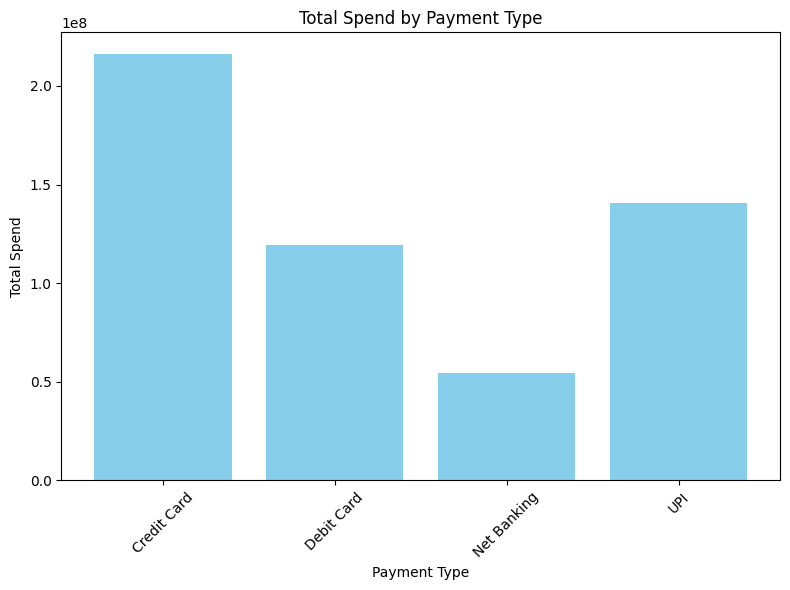

In [89]:
payment_spend_sum = dataset_merged.groupby('payment_type')['spend'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(payment_spend_sum['payment_type'], payment_spend_sum['spend'], color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Total Spend')
plt.title('Total Spend by Payment Type')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()

plt.show()


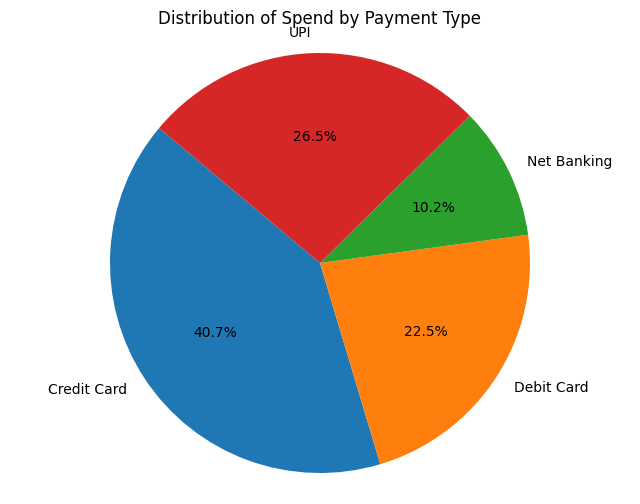

In [90]:
plt.figure(figsize=(8, 6))
plt.pie(payment_spend_sum['spend'], labels=payment_spend_sum['payment_type'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Spend by Payment Type')
plt.show()


In [91]:
dataset_merged.age_group.nunique()

4

In [92]:
age_spend=dataset_merged.groupby("age_group")['spend'].sum().reset_index()
age_spend=age_spend.sort_values(by='spend', ascending=False)
age_spend

,age_group,spend
1,25-34,203357184
2,35-45,190639828
0,21-24,68523077
3,45+,68377666


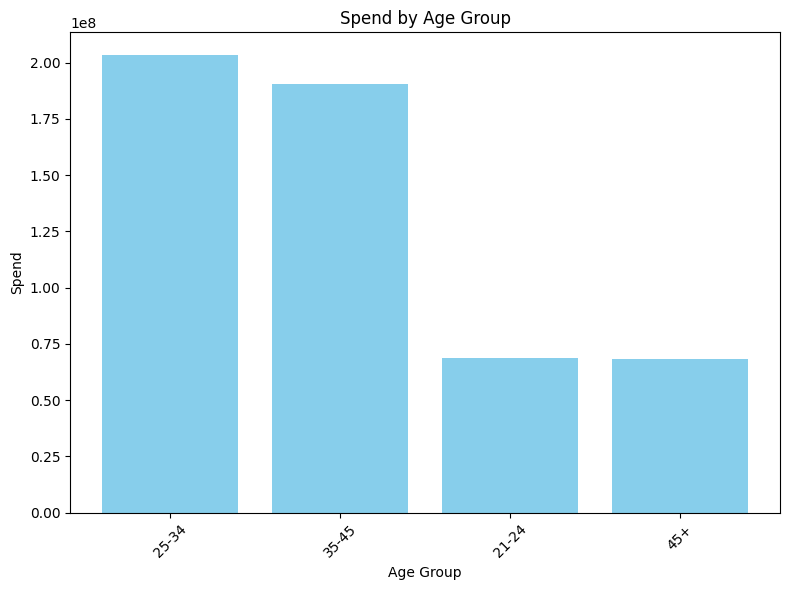

In [93]:
plt.figure(figsize=(8, 6))
plt.bar(age_spend['age_group'], age_spend['spend'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Spend')
plt.title('Spend by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# married vs single spending 

In [94]:
marries_n_single = dataset_merged.groupby("marital status")['spend'].sum().reset_index()
marries_n_single

,marital status,spend
0,Married,429029573
1,Single,101868182


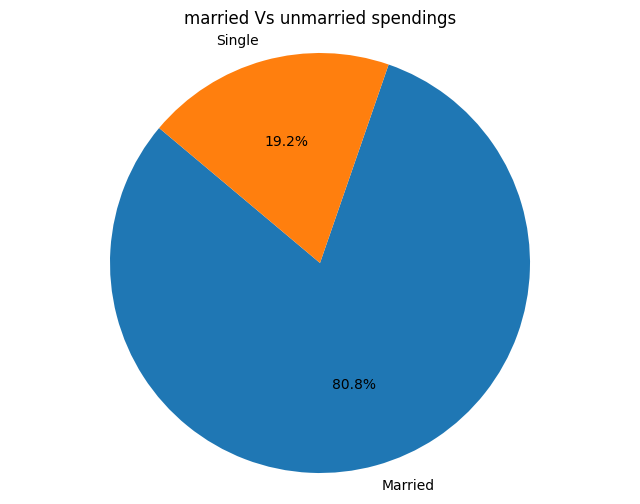

In [95]:
# pie graph 
plt.figure(figsize=(8, 6))
plt.pie(marries_n_single['spend'], labels= marries_n_single['marital status'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('married Vs unmarried spendings')
plt.show()

In [96]:
print("hel")

hel


In [97]:
print(1-34567890)

-34567889


In [98]:
dataset_merged

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [99]:
dataset_merged["payment_type"].head(10)

0    Net Banking
1     Debit Card
2    Credit Card
3     Debit Card
4     Debit Card
5    Net Banking
6    Net Banking
7            UPI
8            UPI
9            UPI
Name: payment_type, dtype: object

In [100]:
dataset_merged.groupby('marital status')['payment_type'].count().reset_index()

,marital status,payment_type
0,Married,677376
1,Single,186624


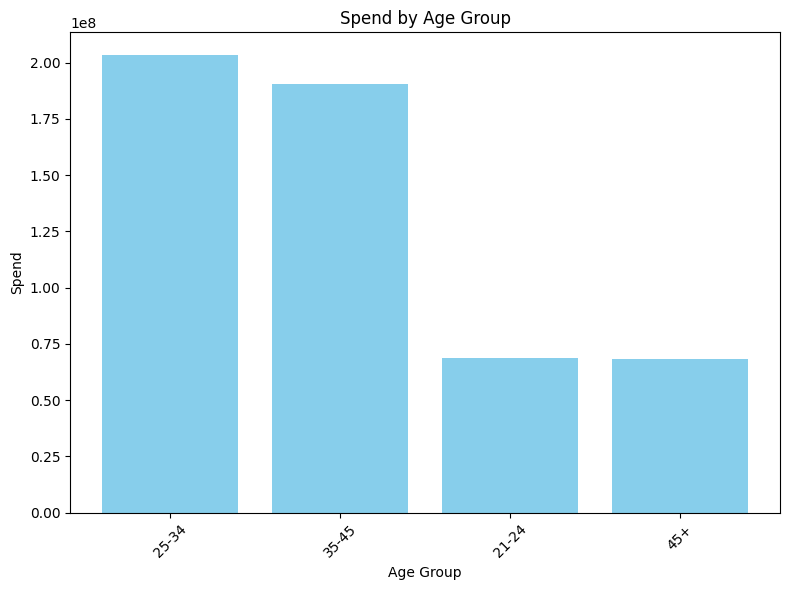

In [101]:
plt.figure(figsize=(8, 6))
plt.bar(age_spend['age_group'], age_spend['spend'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Spend')
plt.title('Spend by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [102]:
mode_per_group = dataset_merged.groupby('marital status')['payment_type'].agg(lambda x: x.mode()[0]).reset_index()
mode_per_group

,marital status,payment_type
0,Married,Credit Card
1,Single,Credit Card


In [103]:
payment_count_by_group = dataset_merged.groupby(['marital status', 'payment_type']).size().reset_index(name='count')
payment_count_by_group

,marital status,payment_type,count
0,Married,Credit Card,169344
1,Married,Debit Card,169344
2,Married,Net Banking,169344
3,Married,UPI,169344
4,Single,Credit Card,46656
5,Single,Debit Card,46656
6,Single,Net Banking,46656
7,Single,UPI,46656


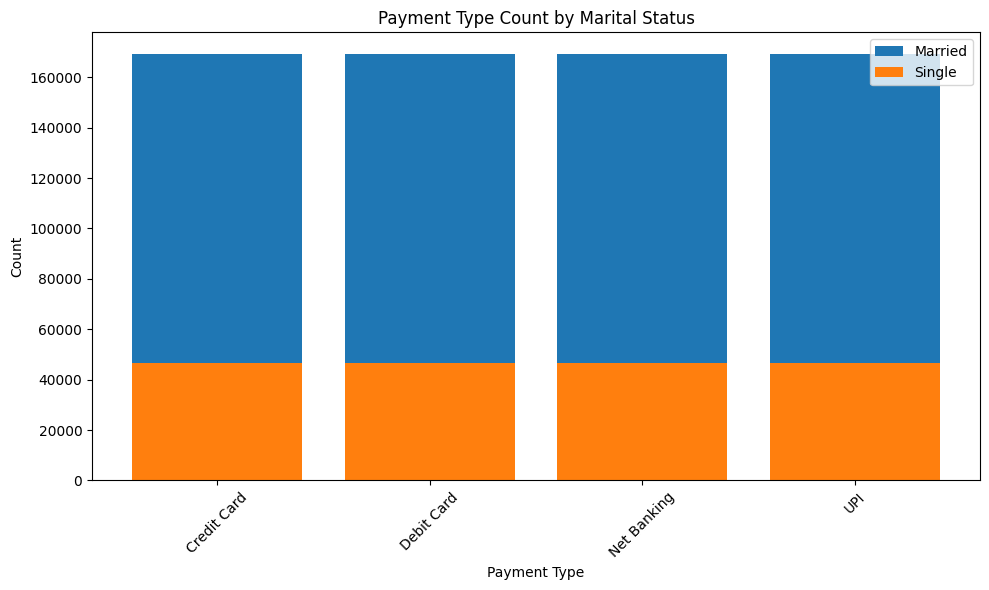

In [104]:
plt.figure(figsize=(10, 6))
for status in payment_count_by_group['marital status'].unique():
    data = payment_count_by_group[payment_count_by_group['marital status'] == status]
    plt.bar(data['payment_type'], data['count'], label=status)

plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Type Count by Marital Status')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
dataset_merged.avg_income.describe()

count    864000.000000
mean      51657.032250
std       14688.312762
min       24816.000000
25%       38701.000000
50%       50422.000000
75%       64773.250000
max       86600.000000
Name: avg_income, dtype: float64

In [106]:
age_stats =dataset_merged.age_group.value_counts().reset_index(name='count')
age_stats

,age_group,count
0,25-34,323568
1,35-45,274968
2,21-24,149256
3,45+,116208


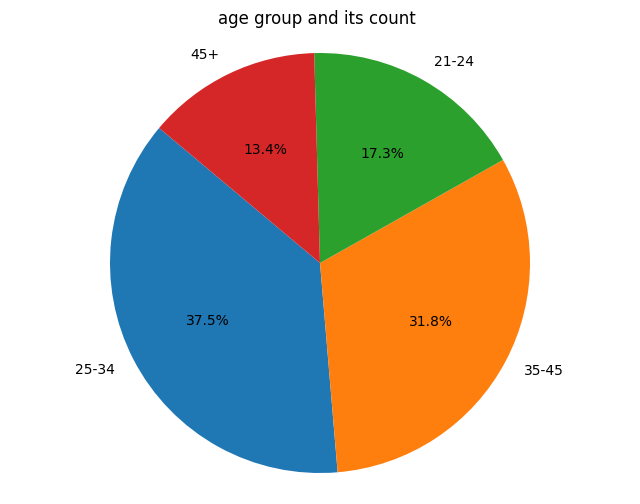

In [107]:
# pie graph 
plt.figure(figsize=(8, 6))
plt.pie(age_stats['count'], labels= age_stats['age_group'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('age group and its count ')
plt.show()

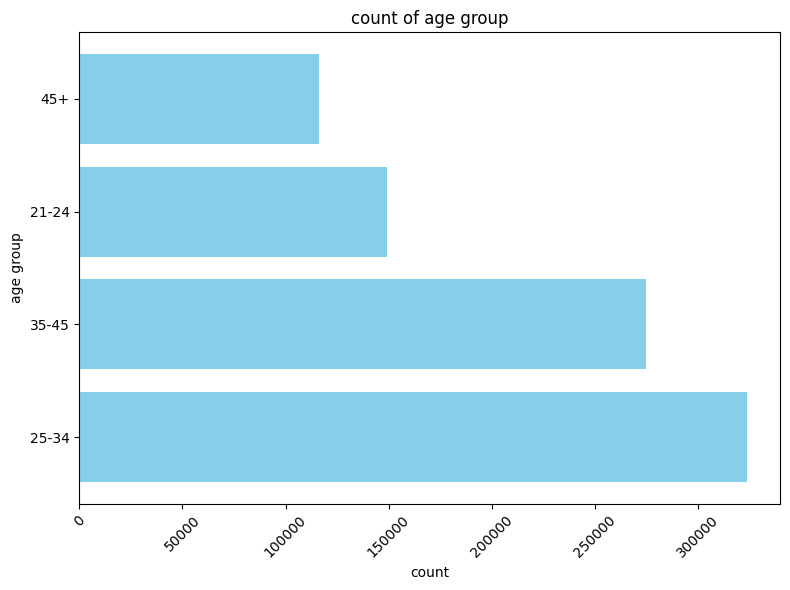

In [155]:
# bar graph 
plt.figure(figsize=(8, 6))
plt.barh(age_stats['age_group'], age_stats['count'], color='skyblue')
plt.xlabel('count')
plt.ylabel('age group')
plt.title('count of age group')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [109]:
dataset_merged.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [110]:
gender_count = dataset_merged.gender.value_counts().reset_index(name="count")
gender_count

,gender,count
0,Male,560952
1,Female,303048


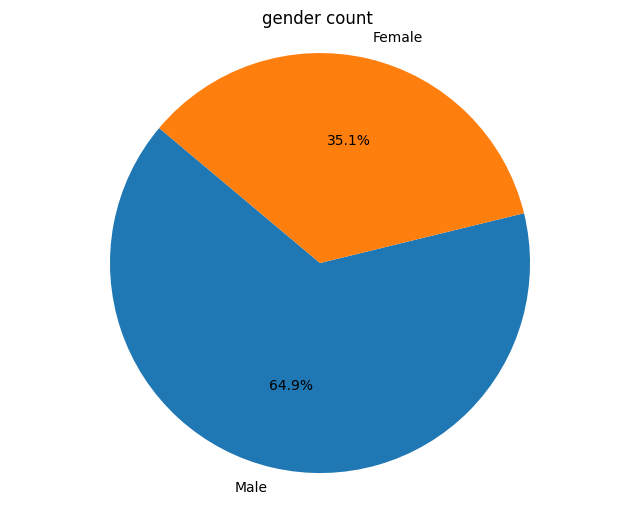

In [111]:
plt.figure(figsize=(8, 6))
plt.pie(gender_count['count'], labels= gender_count['gender'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('gender count ')
plt.show()

In [112]:
occupation_count =dataset_merged.occupation.value_counts().reset_index(name='count')
occupation_count

,occupation,count
0,Salaried IT Employees,279504
1,Salaried Other Employees,192888
2,Freelancers,169344
3,Business Owners,136080
4,Government Employees,86184


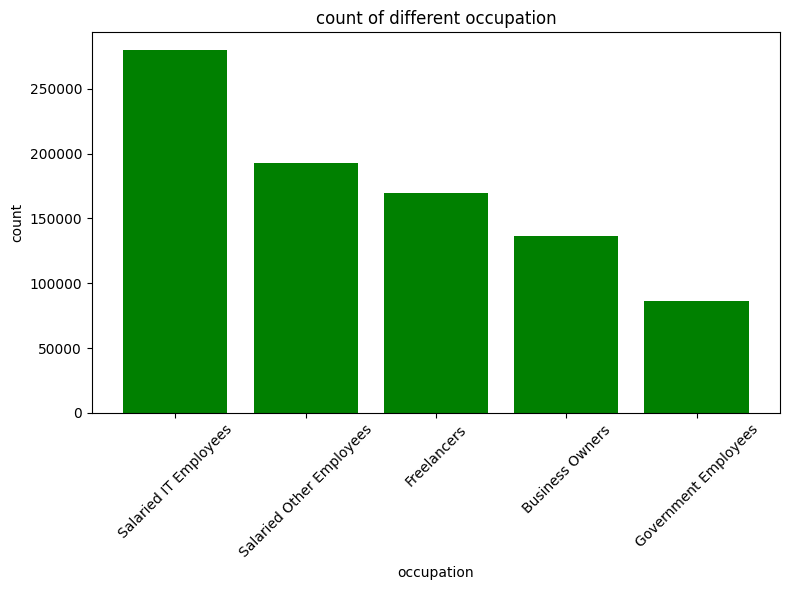

In [113]:
plt.figure(figsize=(8, 6))
plt.bar(occupation_count['occupation'], occupation_count['count'], color='green')
plt.xlabel('occupation')
plt.ylabel('count')
plt.title('count of different occupation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [114]:
dataset_merged.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [115]:
marital_status_count = dataset_merged['marital status'].value_counts().reset_index()
marital_status_count

,marital status,count
0,Married,677376
1,Single,186624


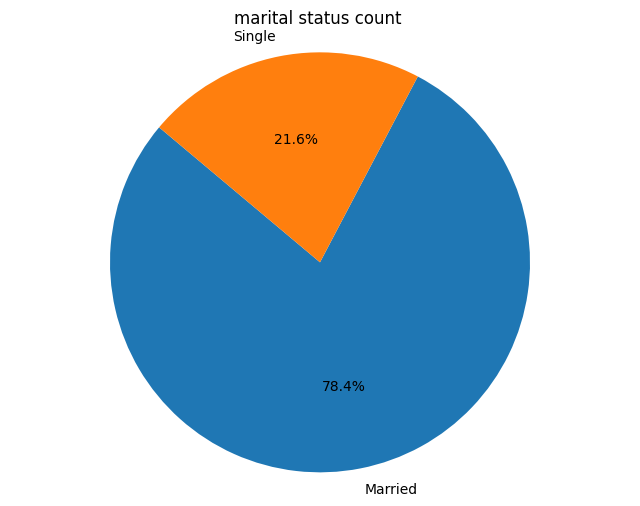

In [116]:
plt.figure(figsize=(8, 6))
plt.pie(marital_status_count['count'], labels= marital_status_count['marital status'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('marital status count ')
plt.show()

In [192]:
average_spend_marital =dataset_merged.groupby('gender')['spend'].mean()
average_spend_marital

gender
Female    573.373584
Male      636.664166
Name: spend, dtype: float64

In [191]:
dataset_merged.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [193]:
ratio_spend_to_income = average_spend_marital/dataset_merged['avg_income'].iloc[0]
ratio_spend_to_income=ratio_spend_to_income.reset_index(name='ratio')
ratio_spend_to_income

,gender,ratio
0,Female,0.007799
1,Male,0.008659


In [194]:
import plotly.express as px


In [195]:
fig = px.bar(ratio_spend_to_income, x='gender', y='ratio', text='ratio', color='gender',
             labels={'ratio': 'Ratio', 'gender': 'Gender'}, title='Gender Ratio')

fig.update_traces(texttemplate='%{text:.6f}', textposition='outside')

fig.show()


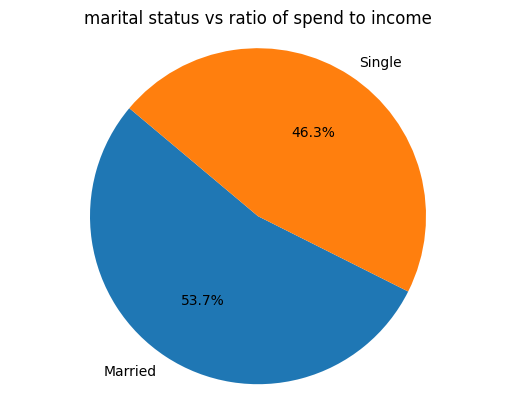

<Figure size 800x600 with 0 Axes>

In [119]:
plt.title('marital status vs ratio of spend to income')
plt.pie(ratio_spend_to_income.ratio, labels=ratio_spend_to_income['marital status'] , autopct='%1.1f%%' ,startangle=140 )
plt.axis('equal')
plt.figure(figsize=(8, 6))
plt.show()

In [120]:
average_spend_age_grp = dataset_merged.groupby('age_group')['spend'].mean()
average_spend_age_grp

age_group
21-24    459.097638
25-34    628.483608
35-45    693.316415
45+      588.407562
Name: spend, dtype: float64

In [121]:
ratio_spend_to_income = average_spend_age_grp/dataset_merged.avg_income.iloc[0]
ratio_spend_to_income = ratio_spend_to_income.reset_index(name='ratio')
ratio_spend_to_income

,age_group,ratio
0,21-24,0.006244
1,25-34,0.008548
2,35-45,0.009430
3,45+,0.008003


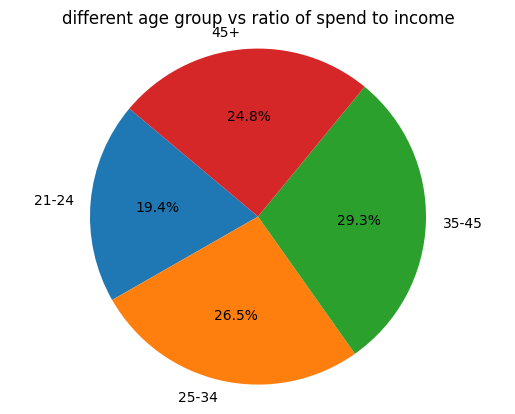

<Figure size 800x600 with 0 Axes>

In [122]:
plt.title('different age group vs ratio of spend to income')
plt.pie(ratio_spend_to_income.ratio, labels=ratio_spend_to_income['age_group'] , autopct='%1.1f%%' ,startangle=140 )
plt.axis('equal')
plt.figure(figsize=(8, 6))
plt.show()

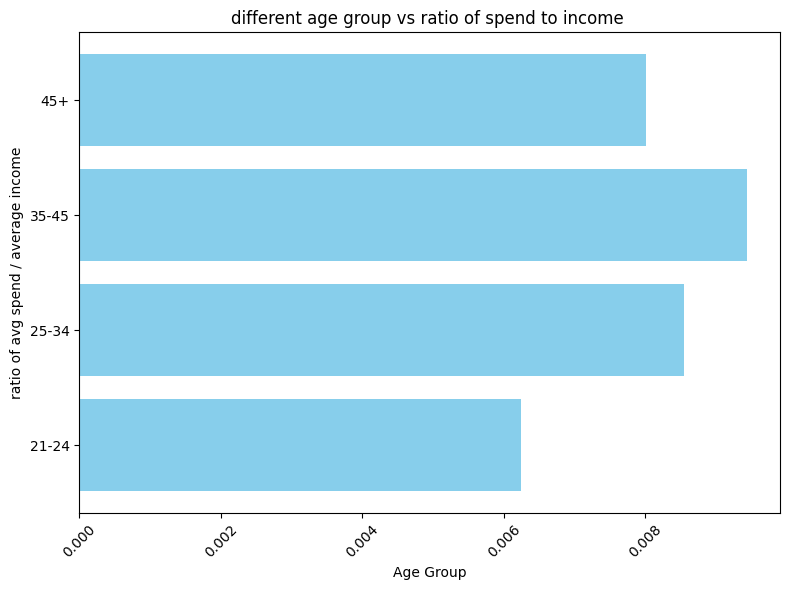

In [123]:
plt.figure(figsize=(8, 6))
plt.barh(ratio_spend_to_income['age_group'], ratio_spend_to_income['ratio'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('ratio of avg spend / average income')
plt.title('different age group vs ratio of spend to income ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [124]:
average_spend_ocupation = dataset_merged.groupby('occupation')['spend'].mean()
ratio_spend_to_income = average_spend_ocupation/dataset_merged.avg_income.iloc[0]
ratio_spend_to_income = ratio_spend_to_income.reset_index(name='ratio')
ratio_spend_to_income

,occupation,ratio
0,Business Owners,0.008796
1,Freelancers,0.006067
2,Government Employees,0.005701
3,Salaried IT Employees,0.011860
4,Salaried Other Employees,0.006171


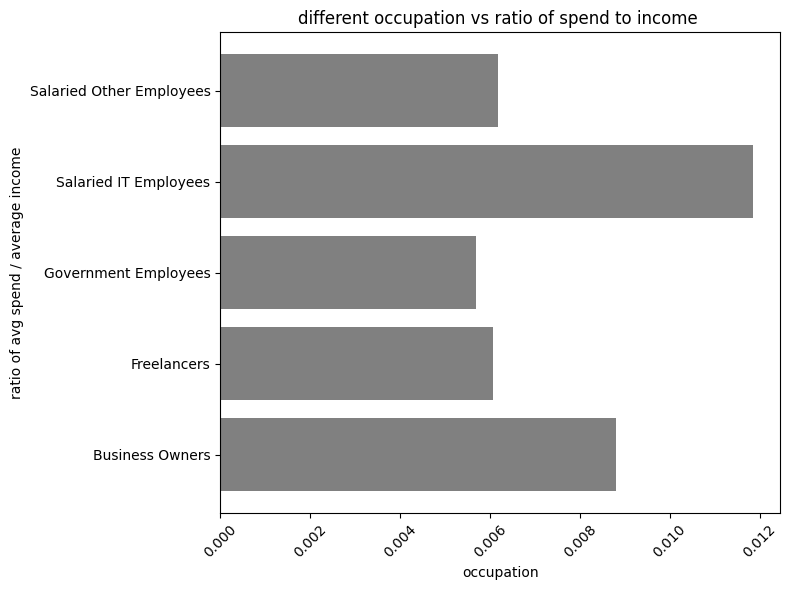

In [125]:
plt.figure(figsize=(8, 6))
plt.barh(ratio_spend_to_income['occupation'], ratio_spend_to_income['ratio'], color='grey')
plt.xlabel('occupation')
plt.ylabel('ratio of avg spend / average income')
plt.title('different occupation vs ratio of spend to income ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [126]:
average_occ_sal = dataset_merged.groupby('occupation')['avg_income'].mean().sort_values(ascending=False)
average_occ_sal=average_occ_sal.reset_index(name="average salary")
average_occ_sal

,occupation,average salary
0,Business Owners,70091.179365
1,Salaried IT Employees,61499.673107
2,Government Employees,52034.834586
3,Salaried Other Employees,38793.436730
4,Freelancers,35058.253827


In [127]:
dataset_merged.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

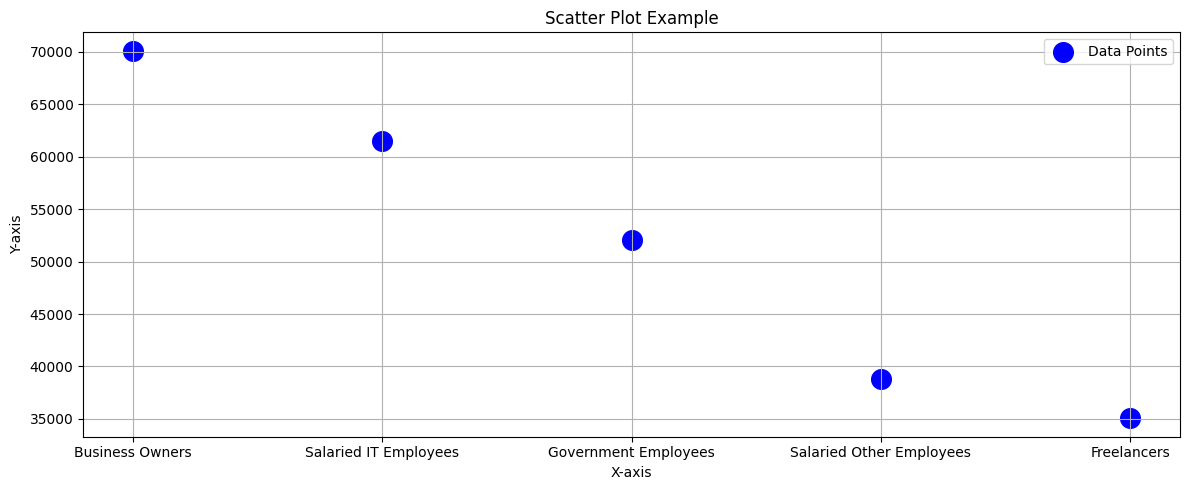

In [128]:
plt.figure(figsize=(12,5))
plt.scatter(average_occ_sal['occupation'], average_occ_sal['average salary'], color='blue', label='Data Points', s=200)

# Adding labels and title
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### spend vs occupation

In [159]:
spend_vs_occ = dataset_merged.groupby('age_group')['spend'].sum().reset_index(name='total spend')
spend_vs_occ

,age_group,total spend
0,21-24,68523077
1,25-34,203357184
2,35-45,190639828
3,45+,68377666


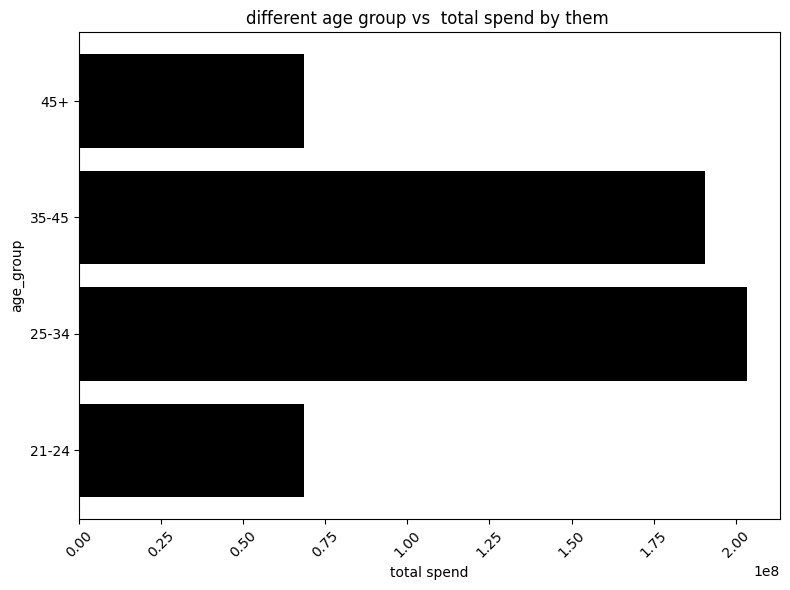

In [160]:
plt.figure(figsize=(8, 6))
plt.barh(spend_vs_occ['age_group'], spend_vs_occ['total spend'], color='black')
plt.xlabel('total spend')
plt.ylabel('age_group')
plt.title('different age group vs  total spend by them ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [131]:
age_vs_salary = dataset_merged.groupby('age_group')['avg_income'].mean().reset_index()
age_vs_salary

,age_group,avg_income
0,21-24,40718.272069
1,25-34,51827.084112
2,35-45,53425.954438
3,45+,61047.566914


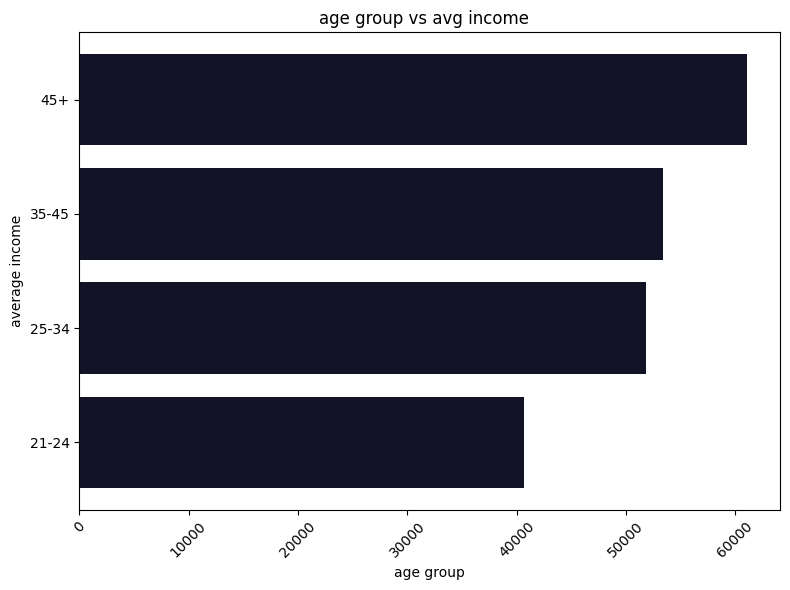

In [156]:
plt.figure(figsize=(8, 6))
plt.barh(age_vs_salary['age_group'], age_vs_salary['avg_income'], color='#131327' )
plt.xlabel('age group')
plt.ylabel('average income')
plt.title('age group vs avg income  ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [133]:
grouped = dataset_merged.groupby(['occupation', 'age_group']).size().reset_index(name='count')
grouped

,occupation,age_group,count
0,Business Owners,21-24,19656
1,Business Owners,25-34,51624
2,Business Owners,35-45,33480
3,Business Owners,45+,31320
4,Freelancers,21-24,23976
5,Freelancers,25-34,60696
6,Freelancers,35-45,66096
7,Freelancers,45+,18576
8,Government Employees,21-24,14256
9,Government Employees,25-34,41904


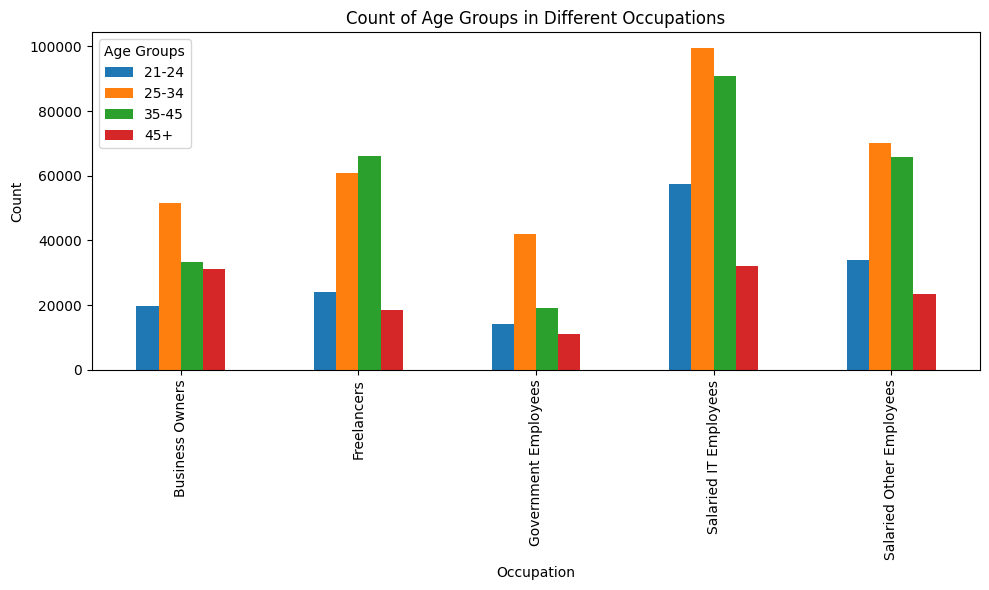

In [134]:
pivot_df = grouped.pivot(index='occupation', columns='age_group', values='count')

# Creating the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Count of Age Groups in Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Age Groups')

plt.tight_layout()

# Show plot
plt.show()


In [139]:
dataset_merged.head(10)

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
5,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,October,Bills,Net Banking,1031
6,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Groceries,Net Banking,1048
7,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Health & Wellness,UPI,922
8,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Apparel,UPI,131
9,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,August,Apparel,UPI,262


In [141]:
dataset_merged.groupby('occupation')['avg_income'].mean().sort_values(ascending=False).reset_index()

,occupation,avg_income
0,Business Owners,70091.179365
1,Salaried IT Employees,61499.673107
2,Government Employees,52034.834586
3,Salaried Other Employees,38793.436730
4,Freelancers,35058.253827


In [145]:
ccc = dataset_merged.groupby(['occupation', 'age_group']).size().reset_index(name='count')
ccc

,occupation,age_group,count
0,Business Owners,21-24,19656
1,Business Owners,25-34,51624
2,Business Owners,35-45,33480
3,Business Owners,45+,31320
4,Freelancers,21-24,23976
5,Freelancers,25-34,60696
6,Freelancers,35-45,66096
7,Freelancers,45+,18576
8,Government Employees,21-24,14256
9,Government Employees,25-34,41904


In [146]:
cred = dataset_merged[dataset_merged.payment_type =='Credit Card']

In [157]:
cred_stat=cred.age_group.value_counts().reset_index(name='count')
cred_stat

,age_group,count
0,25-34,80892
1,35-45,68742
2,21-24,37314
3,45+,29052


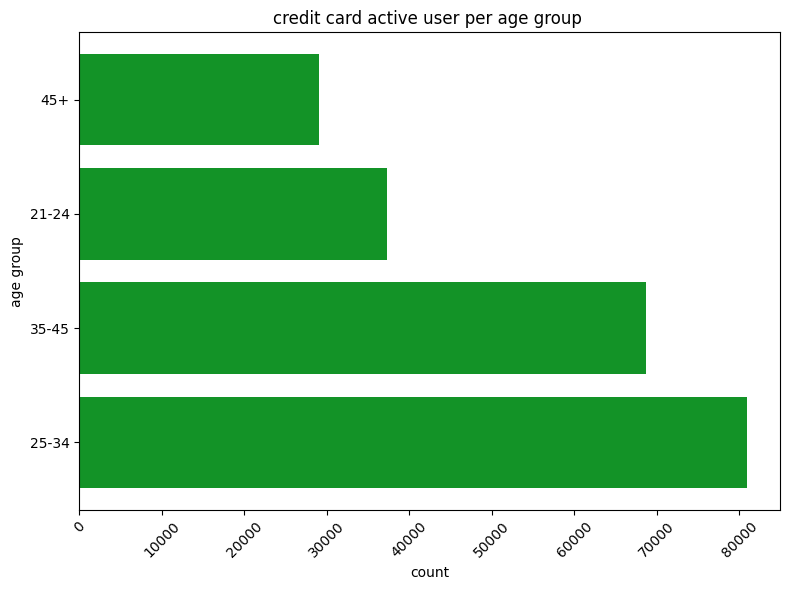

In [158]:
plt.figure(figsize=(8, 6))
plt.barh(cred_stat['age_group'], cred_stat['count'], color='#139327' )
plt.xlabel('count')
plt.ylabel('age group')
plt.title('credit card active user per age group ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [162]:
dataset_merged.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [207]:
mmm=dataset_merged.groupby('gender')['spend'].mean().reset_index()
mmm

,gender,spend
0,Female,573.373584
1,Male,636.664166


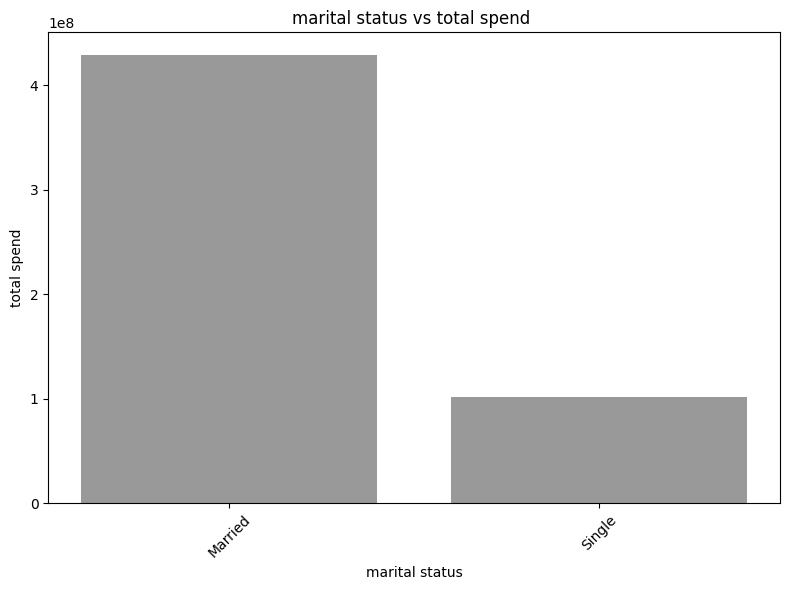

In [174]:
plt.figure(figsize=(8, 6))
plt.bar(mmm['marital status'], mmm['spend'], color='#999999' )
plt.xlabel('marital status')
plt.ylabel('total spend')
plt.title('marital status vs total spend ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

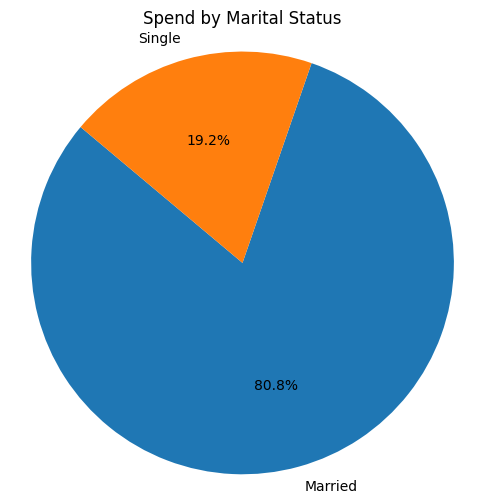

In [175]:
plt.figure(figsize=(6, 6))
plt.title('Spend by Marital Status')

sns.set_palette('pastel')
plt.pie(mmm['spend'], labels=mmm['marital status'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [176]:
import plotly.graph_objects as go

In [208]:
fig = go.Figure(data=[go.Pie(labels=mmm['gender'], values=mmm['spend'], hole=0.5)])
fig.update_traces(textinfo='percent+label', marker=dict(colors=['#FFA07A', '#20B2AA']))

fig.update_layout(
    title='Spend by genders',
    annotations=[dict(text='Spend', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the interactive plot
fig.show()

In [182]:
hh= dataset_merged[dataset_merged.payment_type == 'Credit Card']
hh

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
17,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,August,Groceries,Credit Card,2143
19,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,July,Bills,Credit Card,3825
20,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Travel,Credit Card,1175
24,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,October,Groceries,Credit Card,1353
...,...,...,...,...,...,...,...,...,...,...,...
863972,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Groceries,Credit Card,1366
863973,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Credit Card,310
863979,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,July,Travel,Credit Card,1929
863985,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Others,Credit Card,249


In [209]:
kk=hh['gender'].value_counts().reset_index()
kk

,gender,count
0,Male,140238
1,Female,75762


In [185]:
import plotly.express as px

In [213]:
# Create a bubble chart using Plotly Express
fig = px.scatter(kk, x=kk['gender'], y=kk['count'], size=kk['count'], size_max=60,
                 labels={'count': 'Count'}, title='gender credit card transaction')

fig.update_traces(marker=dict(color='grey', line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

In [196]:
dataset_merged.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [201]:
ass= dataset_merged.groupby('gender')['avg_income'].mean().reset_index()
ass

,gender,avg_income
0,Female,51700.726301
1,Male,51633.427031


In [202]:
fig = px.bar(ass, x='gender', y='avg_income', color='gender', 
             labels={'avg_income': 'Average Income', 'gender': 'Gender'}, title='Average Income by Gender')

fig.update_traces(texttemplate='$%{y:.2f}', textposition='outside')

fig.show()

In [203]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=ass.avg_income,
      theta=ass.gender,
      fill='toself',
      name='Average Income by Gender'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[min(ass.avg_income)-5000, max(ass.avg_income)+5000]
    )),
  showlegend=False,
  title='Average Income by Gender (Radar Chart)'
)

fig.show()


In [204]:
fig = go.Figure(data=[go.Pie(labels=ass.gender, values=ass.avg_income, hole=0.4)])

fig.update_traces(marker=dict(colors=['#FFA07A', '#20B2AA'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title='Average Income by Gender (Donut Chart)')

fig.show()

In [214]:
grouped = dataset_merged.groupby(['marital status', 'gender']).size().reset_index(name='count')
grouped

,marital status,gender,count
0,Married,Female,245376
1,Married,Male,432000
2,Single,Female,57672
3,Single,Male,128952


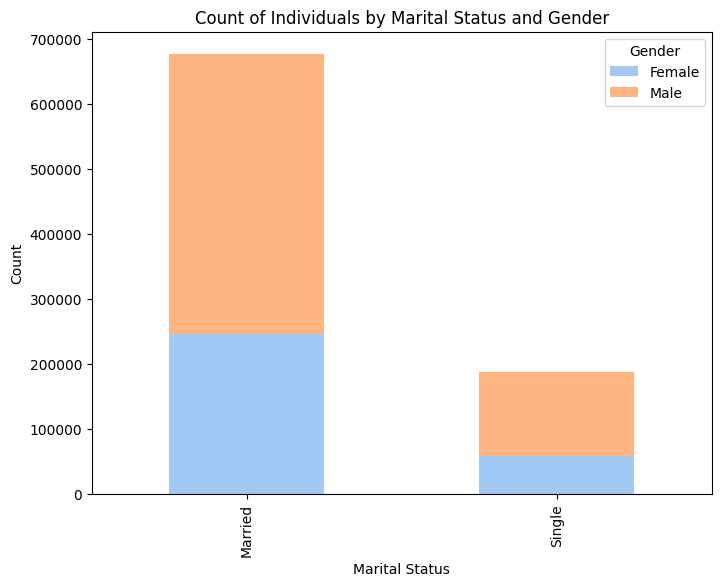

In [215]:
pivot_df = grouped.pivot(index='marital status', columns='gender', values='count')

# Plotting a grouped bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Individuals by Marital Status and Gender')
plt.legend(title='Gender')

plt.show()

In [216]:
dataset_merged

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [232]:
aa= dataset_merged.groupby('month')['spend'].mean().sort_values(ascending=False).reset_index()
aa

,month,spend
0,September,805.066507
1,August,700.412153
2,October,597.403729
3,July,559.894104
4,June,550.820167
5,May,473.193306


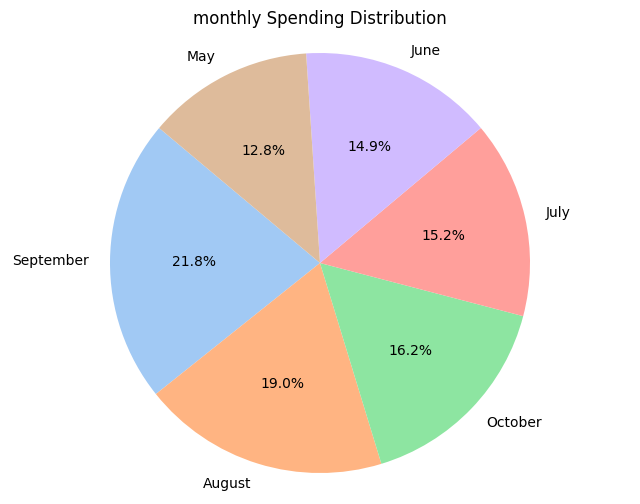

In [233]:
plt.figure(figsize=(8, 6))
plt.pie(aa['spend'], labels=aa['month'], autopct='%1.1f%%', startangle=140)
plt.title('monthly Spending Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [234]:
dataset_merged[['occupation','month','spend']].head(10)

,occupation,month,spend
0,Salaried IT Employees,May,405
1,Salaried IT Employees,May,1096
2,Salaried IT Employees,June,2765
3,Salaried IT Employees,September,363
4,Salaried IT Employees,May,334
5,Salaried IT Employees,October,1031
6,Salaried IT Employees,June,1048
7,Salaried IT Employees,September,922
8,Salaried IT Employees,June,131
9,Salaried IT Employees,August,262


In [237]:
grouped_avg=dataset_merged.groupby(['category','month'])['spend'].mean().reset_index(name="average spending")
grouped_avg

,category,month,average spending
0,Apparel,August,404.789500
1,Apparel,July,322.853187
2,Apparel,June,317.853625
3,Apparel,May,272.644437
4,Apparel,October,344.405000
5,Apparel,September,464.704313
6,Bills,August,1247.361625
7,Bills,July,991.977562
8,Bills,June,980.526187
9,Bills,May,840.902312


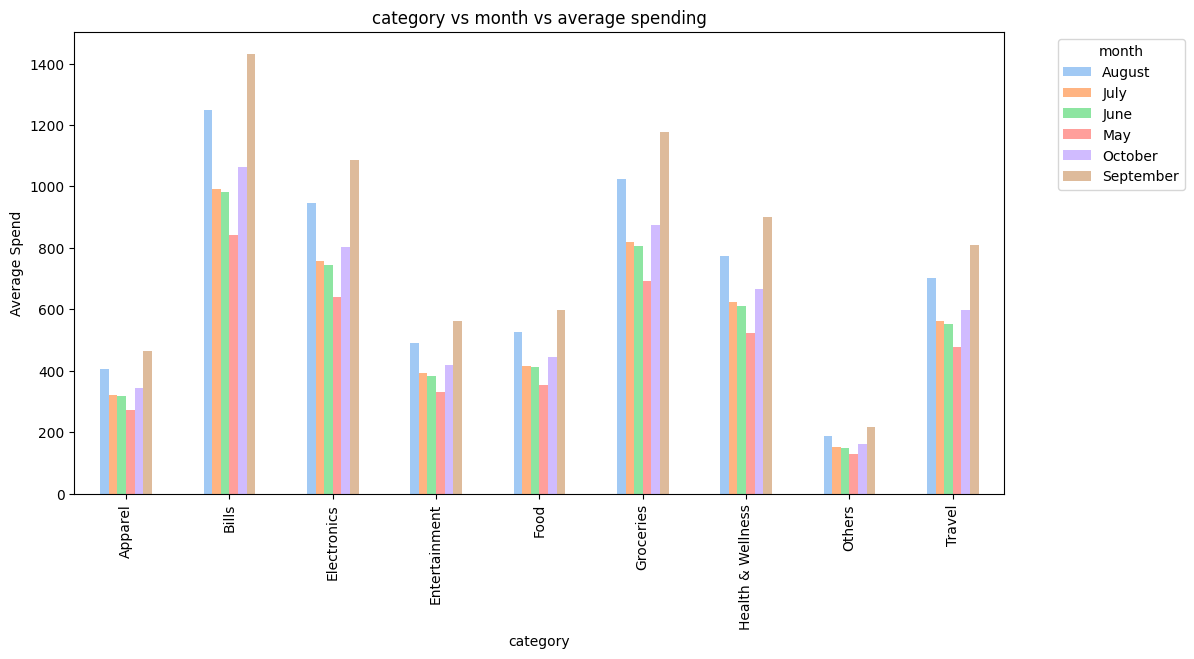

In [239]:
pivot_data = grouped_avg.pivot(index='category', columns='month', values='average spending')

# Plotting a bar chart
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('category')
plt.ylabel('Average Spend')
plt.title('category vs month vs average spending')
plt.legend(title='month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()